In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [298]:
#3.2

def clgs(A):
    A = np.array(A, dtype = float)
    m, n = A.shape
    V = A
    Q = np.eye(m, n)
    R = np.zeros((n,n))
    
    for j in range(n):
        for i in range(j-1):
            R[i, j] = np.dot(np.transpose(Q[:, i]), A[:, j])
            V[:, j] = V[:, j] - np.dot(R[i,j], Q[:,i])
            
        R[j, j] = np.linalg.norm(V[:, j])
        Q[:, j] = V[:, j]/R[j, j]
   
    return Q, R

In [299]:
def mgs(A):

    A = np.array(A, dtype = float)
    m, n = A.shape
    V = A
    R = np.zeros((n, n))
    
    for i in range(n):
        R[i, i] = np.linalg.norm(V[:, i])
        V[:, i] = V[:, i]/R[i,i]
        if i < n :
            for j in range(i+1, n):
                R[i, j] = np.dot(np.transpose(V[:, i]), V[:, j])
                V[:, j] = V[:, j] - np.dot(R[i, j], V[:, i])
    
    Q = V            
 
    return Q, R

In [433]:
def qrhouse(A):
    
    A = np.array(A, dtype = float)
    m, n = A.shape
    R = A
    V = np.zeros((m,n))
    
    for k in range(min(m-1, n)):
        x = R[k:, k]
        v = x + np.transpose(np.sign(x[0]) * np.linalg.norm(x) * np.eye(len(x), 1))
        V[k:, k] = v
        v_T = np.transpose(v)
        R[k:, k:] = R[k:, k:] -np.dot(2*v_T, np.dot(v, R[k:, k:]))/ np.dot(v, v_T)
        
    R = np.triu(R[:n, :n])
    
    return V, R
    
        
def formQ(V):
    V = np.mat(V)
    (m, n) = V.shape
    Q = np.mat(np.eye(m, n))
    for j in range (min(m-2, n-1), -1, -1):
        v = V[:, j]
        Q = Q-(2*v).dot(((v.T).dot(Q))/((v.T).dot(v)))

    Q = np.array(Q)
    
    return Q


In [434]:
#A = [[12, -51, 4], [6, 167, -68], [-4, 24, -41]]
A = [[0.8147,0.0975,0.1576],[0.9058,0.2785,0.9706],[0.1270,0.5469,0.9572],[0.9134,0.9575,0.4854],[0.6324,0.9649,0.8003]]
print(clgs(A)[0])
print(mgs(A)[0])
print(formQ(V))

[[ 0.49266686  0.06523226 -0.4251407 ]
 [ 0.54775702  0.18633009  0.25976153]
 [ 0.07679967  0.36590279  0.79256303]
 [ 0.5523529   0.64061423 -0.19236604]
 [ 0.38242607  0.64556519  0.2943102 ]]
[[ 0.49266686 -0.48066784 -0.17795345]
 [ 0.54775702 -0.35834917  0.57774357]
 [ 0.07679967  0.47543202  0.63432053]
 [ 0.5523529   0.33905494 -0.48084552]
 [ 0.38242607  0.54731202 -0.03114461]]
[[-0.70710173 -0.70711183]
 [-0.70711183  0.70710173]]


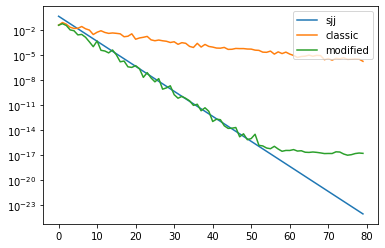

In [406]:
#3.2.a

U, X= np.linalg.qr(np.random.rand(80, 80))
V, X= np.linalg.qr(np.random.rand(80, 80))

S = []
for i in range(80):
    S.append((1/2)**int(i+1))
S = np.diag(S)    

A= np.dot(np.dot(U,S),V)
Qc, Rc = clgs(A)
Qm, Rm = mgs(A)

plt.semilogy(np.diag(S), label = 'sjj')
plt.semilogy(np.diag(Rc), label = 'classic')
plt.semilogy(np.diag(Rm),label = 'modified')
plt.legend(loc = 'upper right')

#modified QR factorization이 classc QR factorization 보다 더 나은 결과를 가져다 준다는 것을 알 수 있다.


In [443]:
#3.2.b
A = [[0.7, 0.70711],[0.70001,0.70711]]

Qm, Rm = mgs(A)
V, R = qrhouse(A)
Q = formQ(V)

print(np.linalg.norm(np.dot(np.transpose(Q),Q)- np.eye(2)))
print(np.linalg.norm(np.dot(np.transpose(Qm),Qm)- np.eye(2)))

#householder QR method가 modified QR method 보다 numerically stable 함을 알 수 있다.

5.787252299533512e-16
3.254726094493924e-11


In [302]:
#3.3
def givens(A):
    
    A = np.array(A, dtype = float)
    
    #givens rotation의 
    def matrix_entries(a, b):
        r = math.hypot(a, b)
        c = a/r
        s = -b/r

        return (c, s)

    (m, n) = np.shape(A)

    Q = np.identity(m)
    R = np.copy(A)

    (rows, cols) = np.tril_indices(m, -1, n)
    for (row, col) in zip(rows, cols):
        if R[row, col] != 0:
            (c, s) = matrix_entries(R[col, col], R[row, col])

            G = np.identity(m)
            G[[col, row], [col, row]] = c
            G[row, col] = s
            G[col, row] = -s

            R = np.dot(G, R)
            Q = np.dot(Q, G.T)
    Q = Q[:m,:n]
    R = R[:n, :n]
    return (Q, R)


print(givens(A))
print(np.linalg.qr(A))

# givens rotation과 python의 linalg 모듈에 내장된 QR decomposition에 대한 결과는 같다.

(array([[ 0.49266686, -0.48066784, -0.17795345],
       [ 0.54775702, -0.35834917,  0.57774357],
       [ 0.07679967,  0.47543202,  0.63432053],
       [ 0.5523529 ,  0.33905494, -0.48084552],
       [ 0.38242607,  0.54731202, -0.03114461]]), array([[ 1.65365294e+00,  1.14046791e+00,  1.25697758e+00],
       [-1.08122717e-17,  9.66094882e-01,  6.34107648e-01],
       [-1.76537715e-18,  4.53373502e-17,  8.81556607e-01]]))
(array([[-0.49266686, -0.48066784,  0.17795345],
       [-0.54775702, -0.35834917, -0.57774357],
       [-0.07679967,  0.47543202, -0.63432053],
       [-0.5523529 ,  0.33905494,  0.48084552],
       [-0.38242607,  0.54731202,  0.03114461]]), array([[-1.65365294, -1.14046791, -1.25697758],
       [ 0.        ,  0.96609488,  0.63410765],
       [ 0.        ,  0.        , -0.88155661]]))


<ipython-input-27-1622bbb80bb9>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  eig[m*k:m*(k+1)] = w
<ipython-input-27-1622bbb80bb9>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  eig[m*k:m*(k+1)] = w
<ipython-input-27-1622bbb80bb9>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  eig[m*k:m*(k+1)] = w
<ipython-input-27-1622bbb80bb9>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  eig[m*k:m*(k+1)] = w
<ipython-input-27-1622bbb80bb9>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  eig[m*k:m*(k+1)] = w


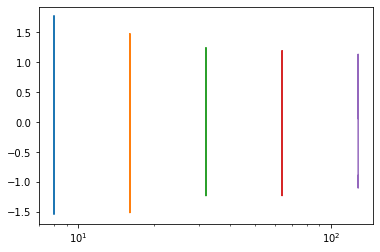

In [27]:
#4.3.a
Matrix_size = [8, 16, 32, 64, 128]
mat_num = 100

for m in Matrix_size:
    eig = np.zeros(m * mat_num)
    for k in range(mat_num):
        A = np.random.randn(m, m) / np.sqrt(m)
        w, v = np.linalg.eig(A)
        eig[m*k:m*(k+1)] = w
    plt.semilogx([m for i in range(m * mat_num)], eig)
    

In [37]:
#4.3.(a)
Matrix_size = [8, 16, 32, 64, 128, 256, 512, 1024]
spectral_norm = []

for m in Matrix_size:
    A = np.random.randn(m, m)/np.sqrt(m)
    eigenvalue = np.linalg.eig(A)[0]
    spectral_norm.append(np.max(eigenvalue))
    
spectral_norm


# m 이 커질수록 spectral radius는 1로 수렴하는 모양이다.

[(0.2963363482713679+0.05527569771240237j),
 (0.7534681945998465+0.6945265057160815j),
 (0.8458254232441971+0.49819481035570246j),
 (0.851087962483404+0.034160030382324895j),
 (0.9808976587543012+0j),
 (1.0024341822043046+0j),
 (0.9778290728780279+0j),
 (1.0071234526773374+0j)]

In [39]:
#4.3.b
Matrix_size = [8, 16, 32, 64, 128, 256, 512, 1024]
second_norm = []

for m in Matrix_size:
    A = np.random.randn(m, m)/np.sqrt(m)
    eigenvalue = np.linalg.eig(A)[0]
    second_norm.append(np.linalg.norm(eigenvalue))
    
second_norm

#m이 커질수록 second norm이 spectral radius보다 확연히 커짐을 알수 있다.

[2.102307360790773,
 2.930850057863633,
 3.968903398900929,
 5.751243301855958,
 8.106435948387597,
 11.349288125547119,
 16.02921714847089,
 22.632291499349407]

In [41]:
#4.3.c
Matrix_size = [8, 16, 32, 64, 128, 256, 512, 1024]
min_eigenvalue = []

for m in Matrix_size:
    A = np.random.randn(m, m)/np.sqrt(m)
    eigenvalue = np.linalg.eig(A)[0]
    min_eigenvalue.append(np.min(eigenvalue))
    
min_eigenvalue



[(-1.1309980344799462-0.11802297353468065j),
 (-0.8403002263310957+0j),
 (-0.9947507335169338+0j),
 (-0.8927585859010159-0.03543810452118192j),
 (-0.938467665503929+0j),
 (-0.9755115319901654-0.13201305922032874j),
 (-0.9628639157062093-0.05141508416217268j),
 (-0.9896849977227277+0j)]